In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
players = pd.read_csv('fifa.csv')
info=pd.read_csv('fifa_ variable_information.csv')

In [4]:
players.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
player1=players.loc[:,['ID', 'Name', 'Age', 'Overall','Value', 'Wage', 'International Reputation','Potential','Position',
               'Contract Valid Until','Stamina','Positioning','Penalties','Height', 'Weight', 'Release Clause']]

In [6]:
player1.rename(columns={'Release Clause':'clause'},inplace=True)

In [7]:
player1.clause.fillna('€0MK',inplace=True)

In [8]:
player1.dropna(inplace=True)

# Question 1

C:\Users\sharm\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


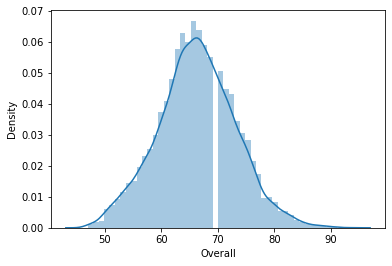

In [9]:
player1
sns.distplot(player1.Overall)
plt.show()

In [128]:
player1.select_dtypes(exclude=np.number).head(3)

,Name,Position,Contract Valid Until
0,L. Messi,RF,2021
1,Cristiano Ronaldo,ST,2022
2,Neymar Jr,LW,2022


In [129]:
player1.select_dtypes(include=np.number).head(3)

,ID,Age,Overall,International Reputation,Potential,Stamina,Positioning,Penalties,clause1,value1,wage1,weight1,height1
0,158023,31,94,5.0,94,72.0,94.0,75.0,226.5,110.5,565.0,159.0,5.7
1,20801,33,94,5.0,94,88.0,95.0,85.0,127.1,77.0,405.0,183.0,6.2
2,190871,26,92,5.0,93,81.0,89.0,81.0,228.1,118.5,290.0,150.0,5.9


# Question 2

* 2.Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

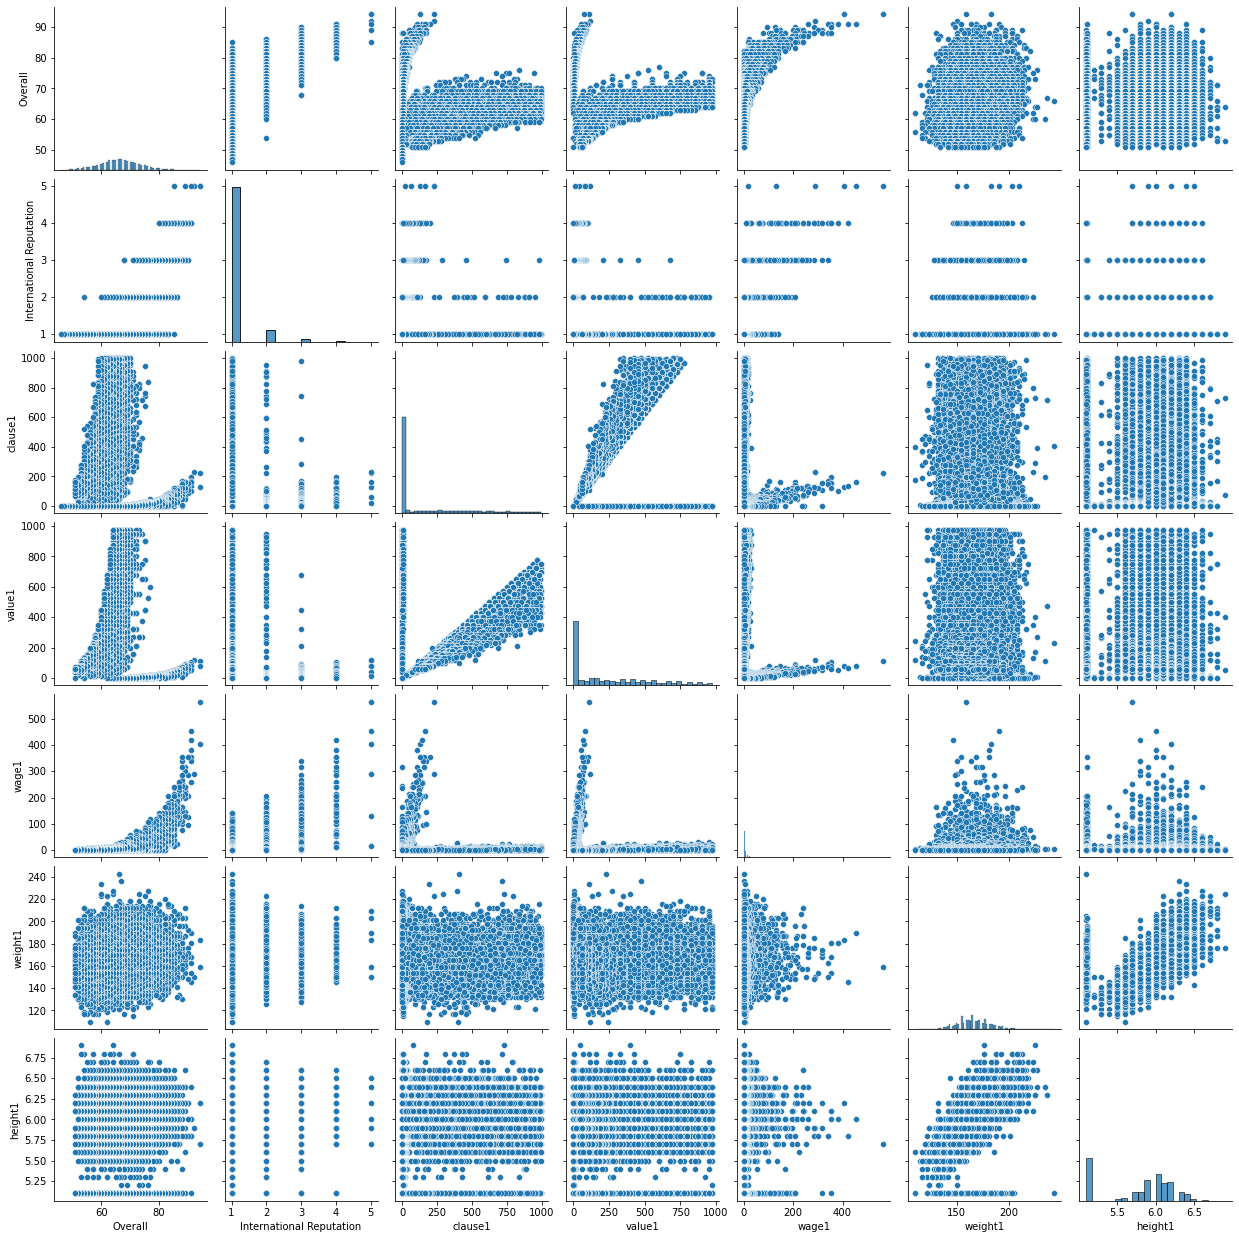

In [143]:
sns.pairplot(player1.iloc[:,[3,4,11,12,13,14,15]])
plt.show()

# Question 3

* 3.Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
* a)What would the average wage for this set of players be?
* b)What is the average age?
* c)Is there a correlation between the Overall rating and Value for these players?


In [181]:
q3=player1[player1.contract==2020].sort_values(by='Overall',ascending=0).head(20)

In [183]:
q3.wage1.mean()

205.45

In [188]:
q3.Age.mean()

30.65

In [190]:
player1.Overall.corr(player1.value1)

-0.24966460044329145

# Question 4

* 4.Generate tables containing the top 5 players by Overall rating for each unique position.
* a)Are there any players appearing in more than one Table. Please point out such players.
* b)What is the average wage one can expect to pay for the top 5 in every position?


* b 

In [ ]:
for i in pp:
    print(i.wage1.mean())

In [232]:
player1.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [322]:
pp=[rf,st,lw,gk,rcm,lf,rs,rcb,lcm,cb,ldm,cam,cdm,ls,lcb,rm,lam,lm,lb,rdm,rw,cm,rb,ram,cf,rwb,lwb]